# Capstone Project 2: Model building

We have cleaned the data. Now it is the time to build models.

We will test different modeling methods and compare them.

The dataset is download from Kaggle. It is about house price. The goal will be use this dataset and build a predictive model for house pricing.

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

## The objective 
The objective of this project would be building a predictive model for house pricing. The result can be used to negotiate house price.
The modeling method can be logistic regression, random forest, gradient boosting, and SVM...
And compare them and pick the best performance one for prediction

In [170]:
!pip install xgboost

### STEP1: Load the tools

In [270]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost
#from xgboost import XBGRegressor
from sklearn.linear_model import ElasticNet

import pickle

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### STEP2: Load the dataset

In [35]:
# load the data for training validate and the model
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [36]:
X_train = X_train.drop(columns=['Unnamed: 0']).values
X_test = X_test.drop(columns=['Unnamed: 0']).values

In [37]:
y_train = y_train.drop(columns=['Unnamed: 0']).values
y_test = y_test.drop(columns=['Unnamed: 0']).values

### STEP5: Modeling

In [110]:
### this dictionary will be used to save all the RMSE scores of using different regression method.
score = {}

#### 5.1 Logistic regression

In [111]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [112]:
R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.745256172346749
MSE score is 1322517030.5722222
RMSE score is 36366.42724508722


In [113]:
score['logistic'] = 36366.42724508722
print (score)

{'logistic': 36366.42724508722}


#### 5.2 Ridge regression

##### For the Ridge method, alpha is a parameter needed to be tuned. I am using the GridSearch method to find the best alpha for this modeling

In [114]:
rr = Ridge()
param = {'alpha': [0.5, 1.0, 1.5, 2.0, 3.0, 5.0, 8, 10, 15, 20]}
rr_cv = GridSearchCV(rr, param, cv=5)
rr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.5, 1.0, 1.5, 2.0, 3.0, 5.0, 8, 10, 15,
                                   20]})

In [115]:
print("Best Score:" + str(rr_cv.best_score_))
print("Best Parameters: " + str(rr_cv.best_params_))

Best Score:0.84423921264847
Best Parameters: {'alpha': 10}


In [116]:
y_pred = rr_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8601407339287077
MSE score is 726087312.7587055
RMSE score is 26946.007362106644


In [117]:
score['ridge'] = 26946
print (score)

{'logistic': 36366.42724508722, 'ridge': 26946}


#### 5.3 Lasso regression

In [118]:
lr = Lasso()
param = {'alpha': 600+10*np.arange(10)}
lr_cv = GridSearchCV(lr, param, cv=5)
lr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([600, 610, 620, 630, 640, 650, 660, 670, 680, 690])})

##### I tuned the alpha parameter to get the best socre.

In [119]:
print("Best Score:" + str(lr_cv.best_score_))
print("Best Parameters: " + str(lr_cv.best_params_))

Best Score:0.8467925762636158
Best Parameters: {'alpha': 670}


In [109]:
y_pred = lr_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8618199944275954
MSE score is 717369336.6294895
RMSE score is 26783.751354683114


In [120]:
score['lasso'] = 26783.751354683114
print (score)

{'logistic': 36366.42724508722, 'ridge': 26946, 'lasso': 26783.751354683114}


#### 5.4. SVR

In [150]:
svr = SVR()
params = {'C': 200000+50000*(1+np.arange(10)), 'epsilon': 200*(1+np.arange(10))}
svr_cv = GridSearchCV(svr, params, cv=5)
svr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000,
       650000, 700000]),
                         'epsilon': array([ 200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800, 2000])})

In [151]:
print("Best Score:" + str(svr_cv.best_score_))
print("Best Parameters: " + str(svr_cv.best_params_))

Best Score:0.7547591287706009
Best Parameters: {'C': 350000, 'epsilon': 1600}


In [152]:
y_pred = svr_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8247056081316602
MSE score is 910050778.2478622
RMSE score is 30167.047887518962


In [153]:
score['svr'] = 30167.047887518962
print (score)

{'logistic': 36366.42724508722, 'ridge': 26946, 'lasso': 26783.751354683114, 'svr': 30167.047887518962}


#### 5.5. Random Forest

In [159]:
rfr = RandomForestRegressor()
params = {'n_estimators': 650+ 10*(1+np.arange(10))}
rfr_cv = GridSearchCV(rfr, params, cv=5)
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': array([660, 670, 680, 690, 700, 710, 720, 730, 740, 750])})

In [160]:
print("Best Score:" + str(rfr_cv.best_score_))
print("Best Parameters: " + str(rfr_cv.best_params_))

Best Score:0.8319734963818796
Best Parameters: {'n_estimators': 740}


In [161]:
y_pred = rfr_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8576821616454049
MSE score is 738851130.2200128
RMSE score is 27181.81616853467


In [162]:
score['random_forest'] = 27181.81616853467
print (score)

{'logistic': 36366.42724508722, 'ridge': 26946, 'lasso': 26783.751354683114, 'svr': 30167.047887518962, 'random_forest': 27181.81616853467}


#### 5.6 XGBoost

In [176]:
xgbr = xgboost.XGBRegressor(objective='reg:linear')
params = {'n_estimators': 10*(1+np.arange(10))}
xgbr_cv = GridSearchCV(xgbr, params, cv=5)
xgbr_cv.fit(X_train, y_train)

[17:26:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:26:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:26:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:26:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:26:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:26:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:17

[17:26:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:26:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:26:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None,
                                    objective='reg:linear', random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
       

In [177]:
print("Best Score:" + str(xgbr_cv.best_score_))
print("Best Parameters: " + str(xgbr_cv.best_params_))

Best Score:0.8069618858077406
Best Parameters: {'n_estimators': 20}


In [178]:
y_pred = xgbr_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8430579081783679
MSE score is 814773771.595597
RMSE score is 28544.242354555445


In [179]:
score['xgboost'] = 28544.242354555445
print (score)

{'logistic': 36366.42724508722, 'ridge': 26946, 'lasso': 26783.751354683114, 'svr': 30167.047887518962, 'random_forest': 27181.81616853467, 'xgboost': 28544.242354555445}


##### Next we are goign to test another way of using XGBoost. Firstly we need to convert the data to dmatrix by xgboost.DMatrix

In [198]:
# convert the train and test data to dmatrix
train_dmatrix = xgboost.DMatrix(data=X_train, label=y_train)
test_dmatrix = xgboost.DMatrix(data=X_test, label=y_test)

param = {'booster': 'gblinear', 'objective': 'reg:linear'}

xg_score=[]
for i in range(1, 10):
    xgb_r = xgboost.train(params=param, dtrain=train_dmatrix, num_boost_round=i)
    y_pred = xgb_r.predict(test_dmatrix)
    #R2 = r2_score(y_test, y_pred)
    #MSE = mean_squared_error(y_test, y_pred, squared=True)
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
    xg_score.append(RMSE)    
    
print(xg_score)
    
#print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

[17:44:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:17

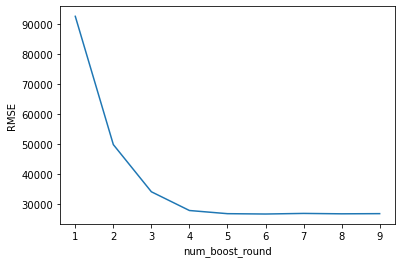

In [199]:
plt.plot(np.arange(1, 10), xg_score)
plt.xlabel('num_boost_round')
plt.ylabel('RMSE')
plt.show()

The best 'num_boost_round' is 5

In [205]:
xgb_r = xgboost.train(params=param, dtrain=train_dmatrix, num_boost_round=5)
y_pred = xgb_r.predict(test_dmatrix)
R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

[17:47:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
R2 score is 0.8631640125012686
MSE score is 710391790.5660414
RMSE score is 26653.17599397943


In [206]:
score['xgboost_dmatrix'] = 26653.17599397943
print (score)

{'logistic': 36366.42724508722, 'ridge': 26946, 'lasso': 26783.751354683114, 'svr': 30167.047887518962, 'random_forest': 27181.81616853467, 'xgboost': 28544.242354555445, 'xgboost_dmatrix': 26653.17599397943}


### 5.7 ElasticNet

In [249]:
en = ElasticNet()
params = {'alpha': [650, 700, 750], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
en_cv = GridSearchCV(en, params, cv=5)
en_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [650, 700, 750],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]})

###### The best l1_ratio is 1. So l2 norm is used for the penalty term. I guess it should be similar as Ridge method. 

In [250]:
print("Best Score:" + str(en_cv.best_score_))
print("Best Parameters: " + str(en_cv.best_params_))

Best Score:0.846786088171538
Best Parameters: {'alpha': 650, 'l1_ratio': 1}


In [252]:
y_pred = en_cv.predict(X_test)
R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8618650592734729
MSE score is 717135379.925996
RMSE score is 26779.383486667426


In [253]:
score['ElasticNet'] = 26779.383486667426
print (score)

{'logistic': 36366.42724508722, 'ridge': 26946, 'lasso': 26783.751354683114, 'svr': 30167.047887518962, 'random_forest': 27181.81616853467, 'xgboost': 28544.242354555445, 'xgboost_dmatrix': 26653.17599397943, 'ElasticNet': 26779.383486667426}


### STEP6. Compare the models

In [257]:
df_score = pd.DataFrame(score.items())

In [259]:
df_score.columns = ['Method', 'RMSE']

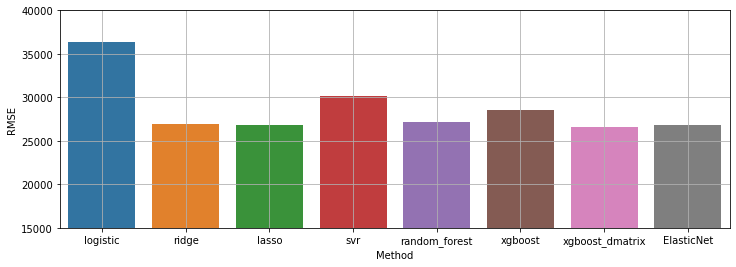

In [269]:
plt.figure(figsize=(12, 4))
sns.barplot(df_score.Method, df_score.RMSE)
plt.grid()
plt.ylim(15000, 40000)
plt.show()

The above RMSE plot shows that Ridge, Lasso, Random Forest, XGBoost_dmatrix, and ElasticNet all have similar error.

Next I am going to use Lasso and xgboost_dmatrix method to run the prediction.

In [271]:
filename = 'lasso_model.sav'
pickle.dump(lr_cv, open(filename, 'wb'))

In [272]:
filename = 'xgboost_dmatrix_model.sav'
pickle.dump(xgb_r, open(filename, 'wb'))

### Summary 

For this linear regression problem, I use several methods and compare the results. They all return similar result except 'logistic' and 'svr' method. 

The indepedent and response variables are original values, and not transformed to log format.